In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("activity_sleep_label.csv")
data

,EMAIL,DIAG_NM,activity_average_met,activity_cal_active,activity_cal_total,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,...,sleep_score_alignment,sleep_score_deep,sleep_score_disturbances,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,sleep_total
0,nia+003@rowan.kr,MCI,1.262897,202.571429,2208.333333,3659.730159,0.793651,615.142857,0.809524,146.428571,...,74.809524,75.492063,57.634921,65.253968,78.650794,54.904762,69.730159,0.022222,0.022222,23543.809524
1,nia+005@rowan.kr,CN,1.370299,217.477876,1773.504425,5084.876106,0.256637,574.619469,0.539823,281.300885,...,86.849558,89.345133,83.601770,97.663717,83.973451,74.433628,81.097345,0.057434,0.057434,28060.088496
2,nia+010@rowan.kr,MCI,1.390625,259.672414,2365.137931,3877.741379,0.637931,632.482759,0.362069,328.827586,...,97.931034,61.517241,63.758621,58.034483,76.965517,64.672414,58.344828,-0.045862,-0.045862,20247.413793
3,nia+013@rowan.kr,MCI,1.478484,493.147541,2577.590164,8769.811475,0.836066,481.016393,0.745902,314.918033,...,90.139344,97.606557,72.549180,88.073770,81.721311,36.295082,69.049180,0.008033,0.008033,23163.196721
4,nia+014@rowan.kr,MCI,1.442555,401.382353,2503.882353,7250.514706,0.382353,534.470588,0.176471,343.852941,...,94.764706,76.867647,55.500000,66.970588,82.500000,38.779412,63.573529,-0.129706,-0.129706,21879.264706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,nia+456@rowan.kr,CN,1.542480,573.781250,2676.125000,10846.750000,5.421875,610.515625,0.609375,283.140625,...,88.718750,85.031250,57.468750,42.156250,83.828125,31.234375,51.750000,-0.125469,-0.125469,18961.875000
170,nia+458@rowan.kr,CN,1.257353,200.549020,2206.941176,3377.098039,0.588235,507.117647,0.392157,206.823529,...,90.686275,88.882353,72.745098,67.705882,75.529412,82.607843,85.274510,-0.040000,-0.040000,28078.823529
171,nia+462@rowan.kr,MCI,1.595274,654.780488,2748.975610,12247.487805,3.121951,473.658537,0.560976,309.951220,...,90.073171,99.634146,71.121951,63.146341,85.317073,28.951220,68.634146,-0.037317,-0.037317,23045.121951
172,nia+475@rowan.kr,CN,1.397418,311.869565,2410.043478,5543.195652,0.108696,675.282609,1.130435,278.891304,...,57.130435,94.456522,68.130435,80.413043,85.913043,27.586957,54.695652,-0.159348,-0.159348,19752.391304


In [13]:
X = data.iloc[:,2:].to_numpy()
X

array([[ 1.26289683e+00,  2.02571429e+02,  2.20833333e+03, ...,
         2.22222222e-02,  2.22222222e-02,  2.35438095e+04],
       [ 1.37029867e+00,  2.17477876e+02,  1.77350442e+03, ...,
         5.74336283e-02,  5.74336283e-02,  2.80600885e+04],
       [ 1.39062500e+00,  2.59672414e+02,  2.36513793e+03, ...,
        -4.58620690e-02, -4.58620690e-02,  2.02474138e+04],
       ...,
       [ 1.59527439e+00,  6.54780488e+02,  2.74897561e+03, ...,
        -3.73170732e-02, -3.73170732e-02,  2.30451220e+04],
       [ 1.39741848e+00,  3.11869565e+02,  2.41004348e+03, ...,
        -1.59347826e-01, -1.59347826e-01,  1.97523913e+04],
       [ 1.33653846e+00,  2.90494505e+02,  2.32793407e+03, ...,
        -8.68131868e-03, -8.68131868e-03,  2.18571429e+04]])

In [17]:
y = data.iloc[:, 1].to_numpy()
y

array(['MCI', 'CN', 'MCI', 'MCI', 'MCI', 'CN', 'MCI', 'Dem', 'CN', 'MCI',
       'CN', 'CN', 'CN', 'MCI', 'CN', 'CN', 'MCI', 'MCI', 'Dem', 'MCI',
       'CN', 'MCI', 'MCI', 'CN', 'MCI', 'Dem', 'MCI', 'MCI', 'CN', 'CN',
       'CN', 'MCI', 'CN', 'MCI', 'MCI', 'MCI', 'CN', 'CN', 'MCI', 'Dem',
       'CN', 'CN', 'CN', 'CN', 'MCI', 'MCI', 'MCI', 'CN', 'MCI', 'CN',
       'Dem', 'CN', 'MCI', 'CN', 'MCI', 'MCI', 'MCI', 'MCI', 'CN', 'CN',
       'CN', 'MCI', 'CN', 'CN', 'MCI', 'CN', 'CN', 'MCI', 'MCI', 'CN',
       'MCI', 'CN', 'Dem', 'CN', 'MCI', 'CN', 'CN', 'MCI', 'CN', 'Dem',
       'CN', 'CN', 'CN', 'CN', 'CN', 'Dem', 'CN', 'CN', 'MCI', 'CN', 'CN',
       'MCI', 'MCI', 'CN', 'MCI', 'CN', 'MCI', 'CN', 'CN', 'MCI', 'CN',
       'MCI', 'MCI', 'Dem', 'MCI', 'CN', 'MCI', 'Dem', 'CN', 'CN', 'CN',
       'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'MCI',
       'CN', 'MCI', 'Dem', 'Dem', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN',
       'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'C

In [19]:
# 전체 데이터 세트를 학습 세트(training set)와 검증 세트(test set)로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(len(X_train), len(X_test))

121 53


In [21]:
# Z-score 표준화: 평균을 0, 표준편차 1로 변환
scaler = StandardScaler() # Scaler 객체 생성
scaler.fit(X_train) # 스케일링(표준화)를 위한 평균과 표준 편차 계산
X_train = scaler.transform(X_train) # 스케일링(표준화 수행)
X_test = scaler.transform(X_test)

In [22]:
# 스케일링(z-score 표준화 수행 결과 확인)
for col in range(4):
    print(f'평균 = {X_train[:, col].mean()}, 표준편차= {X_train[:, col].std()}')

평균 = -2.313576327762258e-15, 표준편차= 0.9999999999999999
평균 = 9.358904835683137e-17, 표준편차= 1.0000000000000002
평균 = -1.3212571532729136e-16, 표준편차= 0.9999999999999998
평균 = -1.2951072721143872e-15, 표준편차= 0.9999999999999999


In [23]:
for col in range(4):
    print(f'평균 = {X_test[:, col].mean()}, 표준편차= {X_test[:, col].std()}')

평균 = -0.25529318458001404, 표준편차= 0.8415642612802389
평균 = -0.19537647859517643, 표준편차= 0.8751281961740023
평균 = -0.19522991195782552, 표준편차= 0.8758793094347628
평균 = -0.19996273781525428, 표준편차= 0.8613926598716497


In [58]:
# k-NN 분류기를 생성
classifier = KNeighborsClassifier(n_neighbors=5)
# 분류기 학습
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [59]:
# 예측
y_pred= classifier.predict(X_test)
print(y_pred)

['CN' 'CN' 'CN' 'MCI' 'MCI' 'CN' 'CN' 'MCI' 'MCI' 'CN' 'CN' 'CN' 'MCI'
 'CN' 'CN' 'CN' 'CN' 'CN' 'CN' 'MCI' 'MCI' 'MCI' 'CN' 'MCI' 'CN' 'CN'
 'MCI' 'CN' 'CN' 'CN' 'CN' 'MCI' 'CN' 'CN' 'CN' 'CN' 'CN' 'CN' 'MCI' 'CN'
 'CN' 'CN' 'CN' 'CN' 'CN' 'CN' 'CN' 'CN' 'MCI' 'CN' 'CN' 'CN' 'CN']


In [60]:
conf_matrix= confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[27  0 10]
 [ 4  0  0]
 [ 9  0  3]]


In [61]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          CN       0.68      0.73      0.70        37
         Dem       0.00      0.00      0.00         4
         MCI       0.23      0.25      0.24        12

    accuracy                           0.57        53
   macro avg       0.30      0.33      0.31        53
weighted avg       0.52      0.57      0.54        53



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [62]:
errors = []
for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    errors.append(np.mean(pred_i != y_test))
print(errors)

[0.5283018867924528, 0.3584905660377358, 0.4528301886792453, 0.33962264150943394, 0.4339622641509434, 0.3584905660377358, 0.4716981132075472, 0.39622641509433965, 0.41509433962264153, 0.4339622641509434, 0.37735849056603776, 0.41509433962264153, 0.41509433962264153, 0.37735849056603776, 0.39622641509433965, 0.37735849056603776, 0.3584905660377358, 0.33962264150943394, 0.3018867924528302, 0.32075471698113206, 0.3018867924528302, 0.32075471698113206, 0.3018867924528302, 0.32075471698113206, 0.32075471698113206, 0.32075471698113206, 0.3018867924528302, 0.3018867924528302, 0.3018867924528302, 0.3018867924528302]


In [63]:
min(errors)

0.3018867924528302

In [36]:
errors.index(min(errors))

18

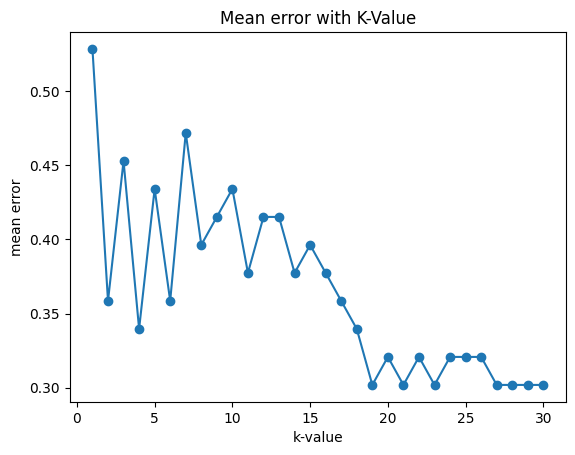

In [51]:
plt.plot(range(1, 31), errors, marker='o')
plt.title('Mean error with K-Value')
plt.xlabel('k-value')
plt.ylabel('mean error')
plt.show()